# Определение перспективного тарифа для телеком-компании

# Описание проекта

На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и найти оптимальный тариф для корректирововки рекламного бюджета компании

# Описание тарифов

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
      * минута разговора: 3 рубля
      * сообщение: 3 рубля
      * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
      * минута разговора: 1 рубль
      * сообщение: 1 рубль
      * 1 Гб интернет-трафика: 150 рублей

# Описание данных

1 . Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана


2. Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок


3. Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение


4. Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
5. Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
# импортируем нужные библиотеки

### Таблица users

In [ ]:
users = pd.read_csv('/datasets/users.csv')
# открываем файл 

In [ ]:
users.head(10)
# вывод на экран 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [ ]:
users.info()
# получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
users['age'].describe()
# посмотрим детально на возраст

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [ ]:
users['tariff'].value_counts()
# уникальные значения тарифов

smart    351
ultra    149
Name: tariff, dtype: int64

In [ ]:
print('Количестов дубликатов в таблице:', users.duplicated().sum())
# проверка на дубликаты

Количестов дубликатов в таблице: 0


In [ ]:
print('Количестов дубликатов в столбце user_id:', users['user_id'].duplicated().sum())
# проверка на дубликаты в столбце

Количестов дубликатов в столбце user_id: 0


### Таблица tariffs

In [ ]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
# открываем файл

In [ ]:
tariffs.head(10)
# вывод на экран

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs.info()
# получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Таблица calls

In [ ]:
calls = pd.read_csv('/datasets/calls.csv')
# открываем файл

In [ ]:
calls.head(10)
# вывод на экран

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [ ]:
calls.info()
# получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
calls['duration'].value_counts()
# посмотрим детально на длительность звонков

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

In [ ]:
print('Количестов дубликатов в таблице:', calls.duplicated().sum())
# проверка на дубликаты

Количестов дубликатов в таблице: 0


### Таблица internet

In [ ]:
internet = pd.read_csv('/datasets/internet.csv')
# открываем файл

In [ ]:
internet.head(10)
# вывод на экран

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [ ]:
internet.info()
# получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [ ]:
internet['mb_used'].value_counts()
# посмотрим на уникальные значения потраченного трафика

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

In [ ]:
print('Количестов дубликатов в таблице:', internet.duplicated().sum())
# проверка на дубликаты

Количестов дубликатов в таблице: 0


### Таблица messages

In [ ]:
messages = pd.read_csv('/datasets/messages.csv')
# открываем файл

In [ ]:
messages.head(10)
# вывод на экран

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [ ]:
messages.info()
# получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
print('Количестов дубликатов в таблице:', messages.duplicated().sum())
# проверка на дубликаты

Количестов дубликатов в таблице: 0


### Вывод
В качестве исследуемых данных имеем 5 датасетов с выборкой по 500 пользователям и их телефонной активностях, а именно: звонки, смс, интернет, а также информация о тарифах, к которым они подключены. После получения информации о данных видим:

1. Таблица **users:** 
    * клиенты имеют уникальный id от 1000 до 1499 и возраст от 18 до 75 лет.
    * **churn_date** - тип object, нужно перевести в формат даты. Есть пропущенные значения, но по условию сказано, что это значит, что тарифом еще пользуются, заполнять не будем.
    * **reg_date** - тип object, нужно перевести в формат даты.
    
    
    
2. Таблица **calls:**   
    * **call_date** - тип object, нужно перевести в формат даты.
    * **duration** - тип float, нужно перевести в тип int и округлить в большую сторону, политика компании "Мегалайн"
    
    
3. Таблица **internet:**
    * **session_date** - тип object, нужно перевести в формат даты.  
    * **Unnamed: 0** - столбец, дублирующий индексы. Возможна была ошибка при выгрузке данных, удалим данный столбец.
    
    
4. Таблица **messages:**
    * **message_date** - тип object, нужно перевести в формат даты.   
    
Для всех датасетов, кроме tariffs, у нас есть общий столбец user_id, по которому мы сможем их объединить.

## Предобработка данных

### Таблица users

In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
# перевод в формат datetime

In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
# перевод в формат datetime

In [ ]:
users.info()
# проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Таблица calls

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
# перевод в формат datetime

In [ ]:
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
# перевод в тип int и округление в большую сторону

In [ ]:
calls['duration'].value_counts()
# посмотрим на уникальные значения для проверки

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

In [ ]:
calls.info()
# проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Таблица internet

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
# перевод в формат datetime

In [ ]:
internet = internet.query('mb_used > 0')
# удалим строки с нулевым значением трафика

In [ ]:
del internet['Unnamed: 0']
# удаляем лишний столбец

In [ ]:
internet['mb_used'].value_counts()
# посмотрим на уникальные значения для проверки

335.91     9
447.30     9
197.56     9
292.14     8
381.50     8
          ..
118.83     1
283.15     1
1043.23    1
231.15     1
677.66     1
Name: mb_used, Length: 70002, dtype: int64

In [ ]:
internet.info()
# проверим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB


### Таблица message

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
# перевод в формат datetime

In [ ]:
messages.info()
# проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Вывод
На этапе предобработки было выполнено следующее:
* Перевод в формат datetime необходимых столбцов
* Округлены минуты в большую сторону до целочисленных значений, как это делает компания "Мегалайн"
* Удалены строки с нулевым значением интернет-трафика
* Удален ошибочный столбец из таблицы internet

## Расчеты дополнительных параметров

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [ ]:
calls['month'] = calls['call_date'].dt.month
# создаем новый столбец с месяцом

In [ ]:
calls_pivot = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum' , 'count'])
calls_pivot.columns = ['calls_sum' , 'calls_count']
calls_pivot
# группируем таблицу по user_id и month для подсчета количсетва звонков и израсходованных минут

calls_sum  calls_count
user_id month                        
1000    5            159           22
        6            172           43
        7            340           47
        8            408           52
        9            466           58
...                  ...          ...
1498    10           247           41
1499    9             70            9
        10           449           68
        11           612           74
        12           492           69

[3174 rows x 2 columns]

### Количество отправленных сообщений по месяцам

In [ ]:
messages['month'] = messages['message_date'].dt.month
# создаем новый столбец с месяцом

In [ ]:
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count')
messages_pivot.columns = ['messages_count']
messages_pivot
# группируем таблицу по user_id и month для подсчета количества сообщений

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

### Объем израсходованного интернет-трафика по месяцам

In [ ]:
internet['month'] = internet['session_date'].dt.month
# создаем новый столбец с месяцом

In [ ]:
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc = 'sum')
internet_pivot.columns = ['mb_sum']
internet_pivot
# группируем таблицу по user_id и month для подсчета траффика

mb_sum
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3201 rows x 1 columns]

### Объединим все таблицы

In [ ]:
calls_messages = calls_pivot.join(messages_pivot, how = 'outer')
calls_messages
# объединяем методом join()

calls_sum  calls_count  messages_count
user_id month                                        
1000    5          159.0         22.0            22.0
        6          172.0         43.0            60.0
        7          340.0         47.0            75.0
        8          408.0         52.0            81.0
        9          466.0         58.0            57.0
...                  ...          ...             ...
1498    10         247.0         41.0            42.0
1499    9           70.0          9.0            11.0
        10         449.0         68.0            48.0
        11         612.0         74.0            59.0
        12         492.0         69.0            66.0

[3213 rows x 3 columns]

In [ ]:
calls_messages_internet = calls_messages.join(internet_pivot, how = 'outer')
calls_messages_internet
# объединяем методом join()

calls_sum  calls_count  messages_count    mb_sum
user_id month                                                  
1000    5          159.0         22.0            22.0   2253.49
        6          172.0         43.0            60.0  23233.77
        7          340.0         47.0            75.0  14003.64
        8          408.0         52.0            81.0  14055.93
        9          466.0         58.0            57.0  14568.91
...                  ...          ...             ...       ...
1498    10         247.0         41.0            42.0  20579.36
1499    9           70.0          9.0            11.0   1845.75
        10         449.0         68.0            48.0  17788.51
        11         612.0         74.0            59.0  17963.31
        12         492.0         69.0            66.0  13055.58

[3214 rows x 4 columns]

In [ ]:
calls_messages_internet = calls_messages_internet.reset_index()
calls_messages_internet
# сбросим индексы таблицы

,user_id,month,calls_sum,calls_count,messages_count,mb_sum
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1498,10,247.0,41.0,42.0,20579.36
3210,1499,9,70.0,9.0,11.0,1845.75
3211,1499,10,449.0,68.0,48.0,17788.51
3212,1499,11,612.0,74.0,59.0,17963.31


In [ ]:
calls_messages_internet_users = calls_messages_internet.merge(users[['user_id','tariff','city']], on = 'user_id', how='left')
calls_messages_internet_users
# объединяем методом merge()

,user_id,month,calls_sum,calls_count,messages_count,mb_sum,tariff,city
0,1000,5,159.0,22.0,22.0,2253.49,ultra,Краснодар
1,1000,6,172.0,43.0,60.0,23233.77,ultra,Краснодар
2,1000,7,340.0,47.0,75.0,14003.64,ultra,Краснодар
3,1000,8,408.0,52.0,81.0,14055.93,ultra,Краснодар
4,1000,9,466.0,58.0,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,41.0,42.0,20579.36,smart,Владикавказ
3210,1499,9,70.0,9.0,11.0,1845.75,smart,Пермь
3211,1499,10,449.0,68.0,48.0,17788.51,smart,Пермь
3212,1499,11,612.0,74.0,59.0,17963.31,smart,Пермь


In [ ]:
tariffs = tariffs.rename({'tariff_name': 'tariff'}, axis='columns')
#переименуем стоблец в 'tariffs' для объединения

In [ ]:
data = calls_messages_internet_users.merge(tariffs, on = 'tariff', how = 'left')
# объединяем методом merge()

In [ ]:
data.isna().sum()
# проверим на количество пропусков

user_id                    0
month                      0
calls_sum                 40
calls_count               40
messages_count           497
mb_sum                    13
tariff                     0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [ ]:
data = data.fillna(0)
# заменим все пропуски на 0

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
👍
</div>  

In [ ]:
data
# вывод на экран

,user_id,month,calls_sum,calls_count,messages_count,mb_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,41.0,42.0,20579.36,smart,Владикавказ,50,15360,500,550,200,3,3
3210,1499,9,70.0,9.0,11.0,1845.75,smart,Пермь,50,15360,500,550,200,3,3
3211,1499,10,449.0,68.0,48.0,17788.51,smart,Пермь,50,15360,500,550,200,3,3
3212,1499,11,612.0,74.0,59.0,17963.31,smart,Пермь,50,15360,500,550,200,3,3


In [ ]:
data.info()
# проверим информацию

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_sum              3214 non-null   float64
 3   calls_count            3214 non-null   float64
 4   messages_count         3214 non-null   float64
 5   mb_sum                 3214 non-null   float64
 6   tariff                 3214 non-null   object 
 7   city                   3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

In [ ]:
data[['calls_count', 'calls_sum', 'messages_count', 'mb_sum']] = (data[['calls_count', 'calls_sum', 'messages_count', 'mb_sum']].astype(int))
# переводим ранее посчитанные значения в тип int

In [ ]:
data.info()
# проверим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   month                  3214 non-null   int64 
 2   calls_sum              3214 non-null   int64 
 3   calls_count            3214 non-null   int64 
 4   messages_count         3214 non-null   int64 
 5   mb_sum                 3214 non-null   int64 
 6   tariff                 3214 non-null   object
 7   city                   3214 non-null   object
 8   messages_included      3214 non-null   int64 
 9   mb_per_month_included  3214 non-null   int64 
 10  minutes_included       3214 non-null   int64 
 11  rub_monthly_fee        3214 non-null   int64 
 12  rub_per_gb             3214 non-null   int64 
 13  rub_per_message        3214 non-null   int64 
 14  rub_per_minute         3214 non-null   int64 
dtypes: int64(13), object(

### Помесячная выручка с каждого пользователя 

In [ ]:
def month_money(row):
    calls_margin = 0
    messages_margin = 0
    mb_margin = 0
    
    if row['calls_sum'] - row['minutes_included'] >= 0:
        calls_margin = row['calls_sum'] - row['minutes_included']
    else:
        calls_margin = 0
        
    if row['messages_count'] - row['messages_included']  >= 0:
        messages_margin = row['messages_count'] - row['messages_included']
    else:
        messages_margin = 0
        
    if row['mb_sum'] - row['mb_per_month_included'] >= 0:
        mb_margin = row['mb_sum'] - row['mb_per_month_included']
    else:
        mb_margin = 0
        
    
    mb_margin = np.ceil(mb_margin / 1024) * row['rub_per_gb']
    
    row['month_money'] = (calls_margin * row['rub_per_minute'] +
                         messages_margin * row['rub_per_message'] +
                         mb_margin +
                         row['rub_monthly_fee'])
    return int(row['month_money'])

# функия для расчета выручки  (вычесть бесплатный лимит из суммарного количества звонков, 
# сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; 
# прибавить абонентскую плату, соответствующую тарифному плану)

In [ ]:
data['month_money'] = data.apply(month_money, axis=1)
data
# добавление столбца с выручкой в таблицу

,user_id,month,calls_sum,calls_count,messages_count,mb_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_money
0,1000,5,159,22,22,2253,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950
1,1000,6,172,43,60,23233,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950
2,1000,7,340,47,75,14003,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950
3,1000,8,408,52,81,14055,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950
4,1000,9,466,58,57,14568,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247,41,42,20579,smart,Владикавказ,50,15360,500,550,200,3,3,1750
3210,1499,9,70,9,11,1845,smart,Пермь,50,15360,500,550,200,3,3,550
3211,1499,10,449,68,48,17788,smart,Пермь,50,15360,500,550,200,3,3,1150
3212,1499,11,612,74,59,17963,smart,Пермь,50,15360,500,550,200,3,3,1513


In [ ]:
data = data.drop(columns=['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1)
# удалим ненужные столбцы для удобства в дальнейшей работе

In [ ]:
data.head(10)
# посмотрим на результат

,user_id,month,calls_sum,calls_count,messages_count,mb_sum,tariff,city,month_money
0,1000,5,159,22,22,2253,ultra,Краснодар,1950
1,1000,6,172,43,60,23233,ultra,Краснодар,1950
2,1000,7,340,47,75,14003,ultra,Краснодар,1950
3,1000,8,408,52,81,14055,ultra,Краснодар,1950
4,1000,9,466,58,57,14568,ultra,Краснодар,1950
5,1000,10,350,57,73,14702,ultra,Краснодар,1950
6,1000,11,338,43,58,14756,ultra,Краснодар,1950
7,1000,12,333,46,70,9817,ultra,Краснодар,1950
8,1001,11,430,59,0,18429,smart,Москва,1150
9,1001,12,414,63,0,14036,smart,Москва,550


### Вывод
На этом этапе с имеющимися данными были выполнены следующие действия:

* Объеденены три таблицы calls, inetnet, messages по клиентам.
* Добавлены колонки с месяцем.
* Выполнено объединение данных из несколько датасетов в один для дальнейшеих расчетов.
* В конечную таблицу добавлена информация о пользователях и тарифах и отсечены столбцы, которые не понадобятся в дальнейшем анализе.
* Подсчитана месячная выручка для каждого пользователя.

## Анализ данных

### Расчет параметров

In [ ]:
data.query("tariff == 'smart'").describe()
# посмотрим общую информацию о тарифе Смарт

,user_id,month,calls_sum,calls_count,messages_count,mb_sum,month_money
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,58.463437,33.384029,16207.879318,1289.973531
std,146.119496,2.920316,190.313730,25.939858,28.227876,5870.480175,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,40.000000,10.000000,12643.000000,550.000000
50%,1239.000000,9.000000,422.000000,60.000000,28.000000,16506.000000,1023.000000
75%,1376.000000,11.000000,545.000000,76.000000,51.000000,20042.000000,1750.000000
max,1499.000000,12.000000,1435.000000,198.000000,143.000000,38552.000000,6770.000000


In [ ]:
data.query("tariff == 'ultra'").describe()
# посмотрим общую информацию о тарифе Ультра

,user_id,month,calls_sum,calls_count,messages_count,mb_sum,month_money
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,526.623350,73.392893,49.363452,19468.322843,2070.152284
std,140.694908,2.871762,317.606098,43.916853,47.804457,10087.173788,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,284.000000,41.000000,6.000000,11770.000000,1950.000000
50%,1277.000000,9.000000,518.000000,74.000000,38.000000,19308.000000,1950.000000
75%,1381.000000,11.000000,752.000000,104.000000,79.000000,26837.000000,1950.000000
max,1495.000000,12.000000,1673.000000,244.000000,224.000000,49745.000000,4800.000000


Из полученный данных можно сделать некоторые выводы:

* Информации о пользователях тарифа Смарт у нас больше, чем у тарифа Ультра, 2229 и 985 соответственно.
* Однако максимальная трата у тарифа Смарт больше, чем у тарифа Ультра, можно предположить, что клиенты чаще переплачивают за тариф из-за отсутствия трафика и минут для звонков.

In [ ]:
statistic_pivot = data.pivot_table(index=['user_id','month','tariff'], values=['calls_sum', 'messages_count', 'mb_sum', 'month_money'], aggfunc = 'median')
statistic_pivot

calls_sum  mb_sum  messages_count  month_money
user_id month tariff                                                
1000    5     ultra         159    2253              22         1950
        6     ultra         172   23233              60         1950
        7     ultra         340   14003              75         1950
        8     ultra         408   14055              81         1950
        9     ultra         466   14568              57         1950
...                         ...     ...             ...          ...
1498    10    smart         247   20579              42         1750
1499    9     smart          70    1845              11          550
        10    smart         449   17788              48         1150
        11    smart         612   17963              59         1513
        12    smart         492   13055              66          598

[3214 rows x 4 columns]

In [ ]:
statistic_mean = statistic_pivot.pivot_table(index = 'tariff', values = ['calls_sum', 'mb_sum', 'messages_count', 'month_money'])
statistic_mean['rub_monthly_fee'] = [550, 1950]
statistic_mean.style.format('{:.0f}')
# сводная таблица для среднего по тарифам

,calls_sum,mb_sum,messages_count,month_money,rub_monthly_fee
tariff,,,,,
smart,418,16208,33,1290,550
ultra,527,19468,49,2070,1950


**Вывод:**
* Средняя продолжительность звонков у пользователей Ультра больше, чем у Смарт.
* Среднее количество сообщений у пользователей Ультра больше, чем у Смарт.
* Среднее количество израсходованного трафика у пользователей Ультра больше, чем у Смарт.
* Тариф Смарт в среднем дешевле , чем тариф Ультра.

Но пользователям тарифа Смарт приходится докупать необходимые услуги для тго, чтобы оставаться на связи. Это нам показывает то, что они переплачивают за тариф в среднем в два раза.

In [ ]:
statistic_other = statistic_pivot.pivot_table(index = ['tariff'], values = ['calls_sum', 'mb_sum', 'messages_count'], aggfunc = [np.median, np.var, np.std])
statistic_other.style.format('{:.0f}')
# сводная для дисперсии и стандартного отклонения

**Вывод:**
* Дисперсия тарифов Ультра больше, и медианы смещены в большую сторону. Эти тарифы выгодее для оператора.

### Построение графиков

In [ ]:
smart = statistic_pivot.query("tariff == 'smart'")
ultra = statistic_pivot.query("tariff == 'ultra'")
# сдеалем срез по тарифам для посторения графиков

Text(0.5, 1.0, 'Гистограмма звонков')

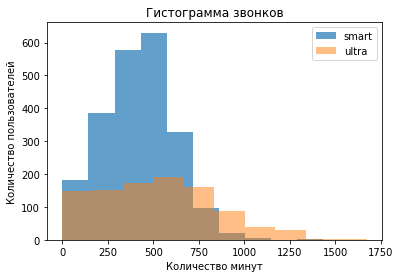

In [ ]:
plt.hist(smart['calls_sum'], alpha=0.7)
plt.hist(ultra['calls_sum'], alpha=0.5)
plt.legend(['smart', 'ultra'])
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма звонков')
# строим гистограмму

Text(0.5, 1.0, 'Гистограмма сообщений')

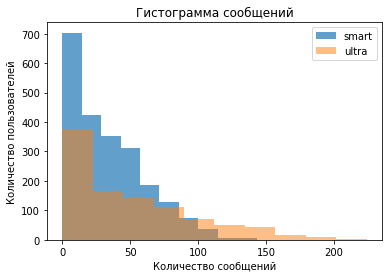

In [ ]:
plt.hist(smart['messages_count'], alpha=0.7)
plt.hist(ultra['messages_count'], alpha=0.5)
plt.legend(['smart', 'ultra'])
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма сообщений')
# строим гистограмму

Text(0.5, 1.0, 'Гистограмма интернет траффика')

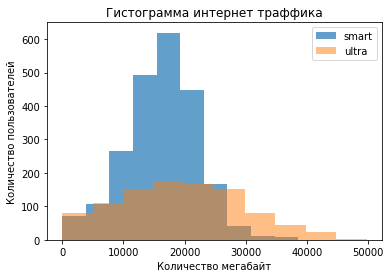

In [ ]:
plt.hist(smart['mb_sum'], alpha=0.7)
plt.hist(ultra['mb_sum'], alpha=0.5)
plt.legend(['smart', 'ultra'])
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма интернет траффика')

# строим гистограмму

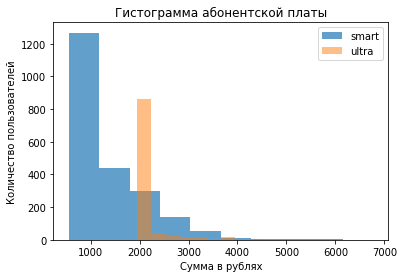

In [ ]:
plt.hist(smart['month_money'], alpha=0.7)
plt.hist(ultra['month_money'], alpha=0.5)
plt.legend(['smart', 'ultra'])
plt.xlabel('Сумма в рублях')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма абонентской платы')
density=True
# строим гистограмму

### Вывод

На данном этапе проделали следующее:


* Определили сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц 
* Посчитали среднее количество, дисперсию и стандартное отклонение.
* Построили графики


Исходя из полученных данных, видим следующее: позьзователи тарифа Ультра не тратят количество минут и сообщений в своем тарифе. Пользователям Смарт часто не хватает трафика и им приходится доплачивать. На графиках видно, что пользователи тарифа Ультра пользуются звонками , сообщениями и интернетом больше, чем пользователи Смарт. Так же убедились, что дисперсия тарифов у Ультра больше.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую и альтернативную гипотезы:

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна

H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Пороговое значение alpha примем за 5%

In [ ]:
alpha = .05

results = st.ttest_ind(smart['month_money'], ultra['month_money'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


**Вывод:**

Проверка показала, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, то есть альтернативная гипотеза подтвердилась.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем нулевую и альтернативную гипотезы:

H0 - cредняя выручка пользователей из Москвы равна выручки пользователей из других регионов.

H1 - cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha примем за 5%

In [ ]:
moscow = data.query('city == "Москва"')['month_money']
other_regions = data.query('city != "Москва"')['month_money']
# делаем срез для того, чтобы выделить Москву и другие регионы

In [ ]:
alpha = 0.05 

results = st.ttest_ind(moscow, other_regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Проверка показала, что cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 

### Вывод

Проверили 2 гипотезы:

* Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    
В первом случае гипотеза подтвердилась, средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различается. Во втором случае гипотеза не подтвердилась, это значит, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов при установленном alpha в 5%.


## Общий вывод

Выполнили анализ тарифов на небольшой выборке клиентов. В нашем распоряжении были данные 500 пользователей «Мегалайна». Было выполнено следующее:

* Изучены даннные из 5 предоставленных датасетов. Были полученны личные данные клиента, дата подключения и отключения тарифа, место подключения, данные об объеме используемого трафика, сообщениях и телефонных звонках (их продолжительность). Отдельный датасет об условиях каждого тарифа


* Произведена предобработка предоставленных данных. Из них было расчитано для каждого пользователя и занесено в сводную таблицу:
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя
  
  
* Построены графики сравнения ежемесячных расходов пользователей для тарифов Смарт и Ультра для звонков, сообщений, объема трафики и абонентской платы. Посчитаны среднее, дисперсия и стандартное отклонение. Из этих данных видно, что пользователи тарифа Ультра пользуются интернетом, смс и телефонной связью в среднем больше, чем пользователи тарифа Смарт. Так же средние и седианные значения у тарифа Ультра больше, чем у Тарифа Смарт.


* Были выдвинуты и проверены 2 гипотезы. Результаты помогли нам опровергнуть гипотезу о том, что средняя выручка пользователей разных тарифов равна, а так же с большой вероятностью сказать, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.


В итоге хоть и тариф Смарт более популярен среди пользователей (подключившихся пользователей в выборки больше в 2 раза), но среднемесячный доход больше с пользователей тарифа Ультра. Поэтому отвечая на вопрос, какой тариф лучше, выберем Ультра, можно направлять рекламные компании на данный тариф. Также среди пользователей тарифа Смарт есть те, кто регулярно переплачивает по тарифу, поэтому для них имеет смысл перейти на Ультра